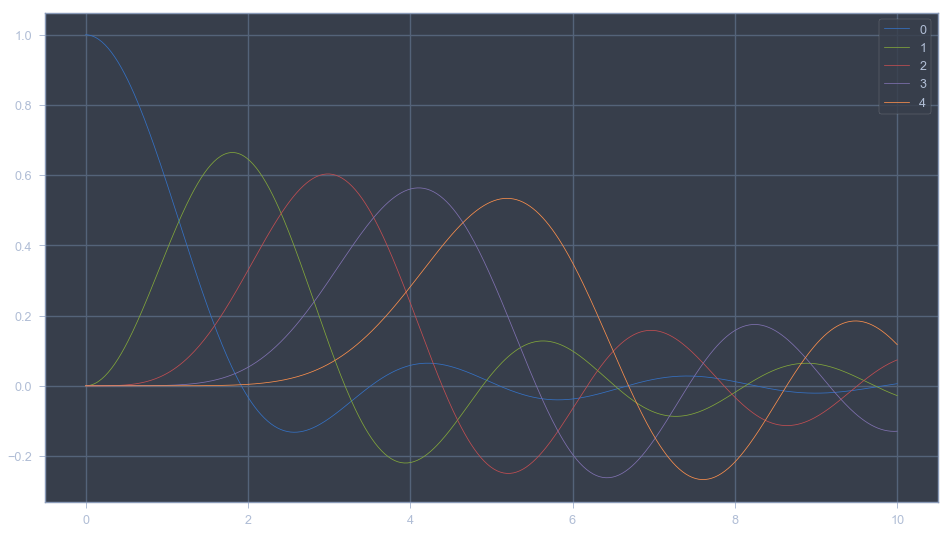

In [17]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

N= 50
k= 1
a= 1
m= np.ones(N)
dt= 0.02
tVals= np.array([0,10])
xStart= np.zeros(2*N)
xStart[0]= 1

def f(uArray, t, aParam):
    m= aParam[0]
    k= aParam[1]
    
    ret= np.empty(uArray.shape[0])
    for i in range(0, uArray.shape[0], 2):
        ret[i]= uArray[i+1]
    for i in range(0, np.floor(uArray.shape[0]/2).astype(int)):
        if i==0:
            ret[1]= k/m[i]*(-uArray[0]+uArray[2])
        elif i==np.floor(uArray.shape[0]/2).astype(int)-1:
            ret[2*i+1]=k/m[i]*(-uArray[2*i]+uArray[2*i-2])  
        else:
            ret[2*i+1]= k/m[i]*(-2*uArray[2*i]+uArray[2*i-2]+uArray[2*i+2])
    return ret

def RK4solve(func, u, start, dt, tStart, FuncParams= None):
    """
    Uses fourth order Runge-Kutta to solve the DE func in Array u. 
    @param
        func: Function to be solved. Must have parameters: 
            uArray (current t-column of u)  
            t (current time) 
            aParam (same as FuncParams)
        u: NumPy Array in which the function is solved. must have 2 dimensions: 
            first one for the partial differential equations u_1, u_2, etc., 
            second one for the steps in time, i.e. u_1(X)
        start: List with initial conditions of u, i.e. [u_1(0), u_2(0), ...]
        t: current time for the solution of the DE's
        tStart: time for initial conditions start
        FuncParams: for additional arguments required for func
    @return None, edits u in-place
    """ 
    t= tStart
    u[:,0]= start #set up starting values
    for i in range(1,u.shape[-1]): #go through every (time) step for func
        t+=dt
        c1=dt*func(u[:,i-1], t, FuncParams) #calculate first increment
        c2=dt*func(u[:,i-1]+0.5*c1, t, FuncParams) #calculate second increment
        c3=dt*func(u[:,i-1]+0.5*c2, t, FuncParams) #calculate third increment
        c4=dt*func(u[:,i-1]+c3, t, FuncParams) #calculate fourth increment
        u[:,i]= u[:,i-1]+(c1+2.0*c2+2.0*c3+c4)/6.0 #calculate next value of solution
    return None

tSteps= np.floor((tVals[1]-tVals[0])/dt).astype(int)
T= np.linspace(tVals[0], tVals[1], tSteps)
u= np.empty((2*N, tSteps))
RK4solve(f, u, xStart, dt, tVals[0], FuncParams=[m, k])

plt.figure(1, figsize=[16,9])
for i in range(0,5):
    plt.plot(T, u[2*i], label=str(i))
plt.grid()
plt.legend()